# [LELEC2870] - Machine Learning

## Practical Session 1 - Linear Regression 

Prof. Michel Verleysen<br>
Prof. John Lee<br>

**Teaching assistants :**  
Edouard Couplet : edouard.couplet@uclouvain.be  <br>
Audrey Vermeulen: audrey.vermeulen@uclouvain.be<br>
Maxime Zanella: maxime.zanella@uclouvain.be<br>


In this first exercise session, you'll implement linear regression between the target values and one of the features of the dataset.

You'll then move on to the multivariate linear regression (linear regression between the target and several input features). Next, you will learn how to build a linear model on a complete dataset i.e. using all features, even though there is no clear linear relation between the features and the target. Finally, you will implement an iterative method named Stochastic Gradient Descent (SGD) useful for optimizing objective function.

We provide you with a dataset for the topic covered in this session. This dataset can be found on the Moodle page of this course. This dataset contains information about patients suffering from diabetes. In other (course) words, you have 10 features (age, sex, bmi, ...) and 1 target (a quantitative measure of their disease progression). For this TP session, you will have to predict (or at least try) the target depending on those features. 

Have fun !

## 1. Linear Regression

<div class="alert alert-info">
    
**Linear algebra notations**

The output prediction of a linear regressor for an element $p$ can be written as follows:
            
\begin{equation*}
    t_p = w_0 + w_1. x_p^1 + w_2. x_p^2 + ... + w_D. x_p^D
\end{equation*}
with $D$ the number of dimensions of input vector $\mathbf{x}$, $w_1...w_D$ the weights of each feature/dimension, and $w_0$ the independent term (=bias).

A linear regressor can be equivalently described as a simple neural network with only one layer and a linear activation function.  The analytical expression of its output is 
\begin{equation*}
    t_p = \sigma (\mathbf{x}_p \mathbf{w} + w_0).
\end{equation*}
where $\mathbf{w}$ is the weights column vector, $w_0$ is the bias, $\sigma$ is the activation function and $t_p$ is the output of the network. In order to simplify notations, the bias is generally included in the inputs and weights vectors, i.e. $\mathbf{x}_p$ becomes
\begin{equation*}
        \begin{pmatrix}  1 & \mathbf{x}_p \end{pmatrix}
\end{equation*}
and $\mathbf{w}$ becomes
\begin{equation*}
    \begin{pmatrix}  w_0 \\ \mathbf{w} \end{pmatrix}.
\end{equation*}
This convention is used in the rest of this exercise session.  Since the activation is linear, the output of one-layer neural networks becomes simply
\begin{equation*}
    t_p = \mathbf{x}_p \mathbf{w}.
\end{equation*}
Notice that now, $\mathbf{x}_p$ and $\mathbf{w}$ are both vectors of length $(D+1)$.

We can extend this to vectorial outputs (of length $P$) in the following way
\begin{equation*}
    \mathbf{t} = \mathbf{X} \mathbf{w},
\end{equation*}
with the shape of $\mathbf{X}$ being $P\times (D+1)$
</div>  


In [ ]:
import matplotlib
import scipy.io
import numpy as np
import random
import plotly.express as px
from matplotlib import pyplot as plt
import sklearn
try:
    import seaborn as sns
    use_seaborn = True
    sns.set()
except:
    use_seaborn = False

### 1.1 Univariate regression
Since 10 features are available in the provided dataset, we ask you to select one (or more) of them to perform regression on in the following exercises. 

For each feature, **visualize** the relationship between the feature and the target by using matplotlib.scatterplot. How can you at a glance tell which features will be most useful?


<div class="alert alert-success">
    
**Load and visualize the dataset**
    
* **Plot** each feature in function of the target.
* If you had to **select** 1 feature only, which one would you keep?

</div>



In [2]:
df = scipy.io.loadmat(f"data/diabetes.mat")
X = df["X"]
n_samples, n_feats = X.shape
t = df["t"]
t_names = ["age", "sex", "bmi", "blood_pressure", "serum_1", 
           "serum_2", "serum_3", "serum_4", "serum_5", "serum_6"]


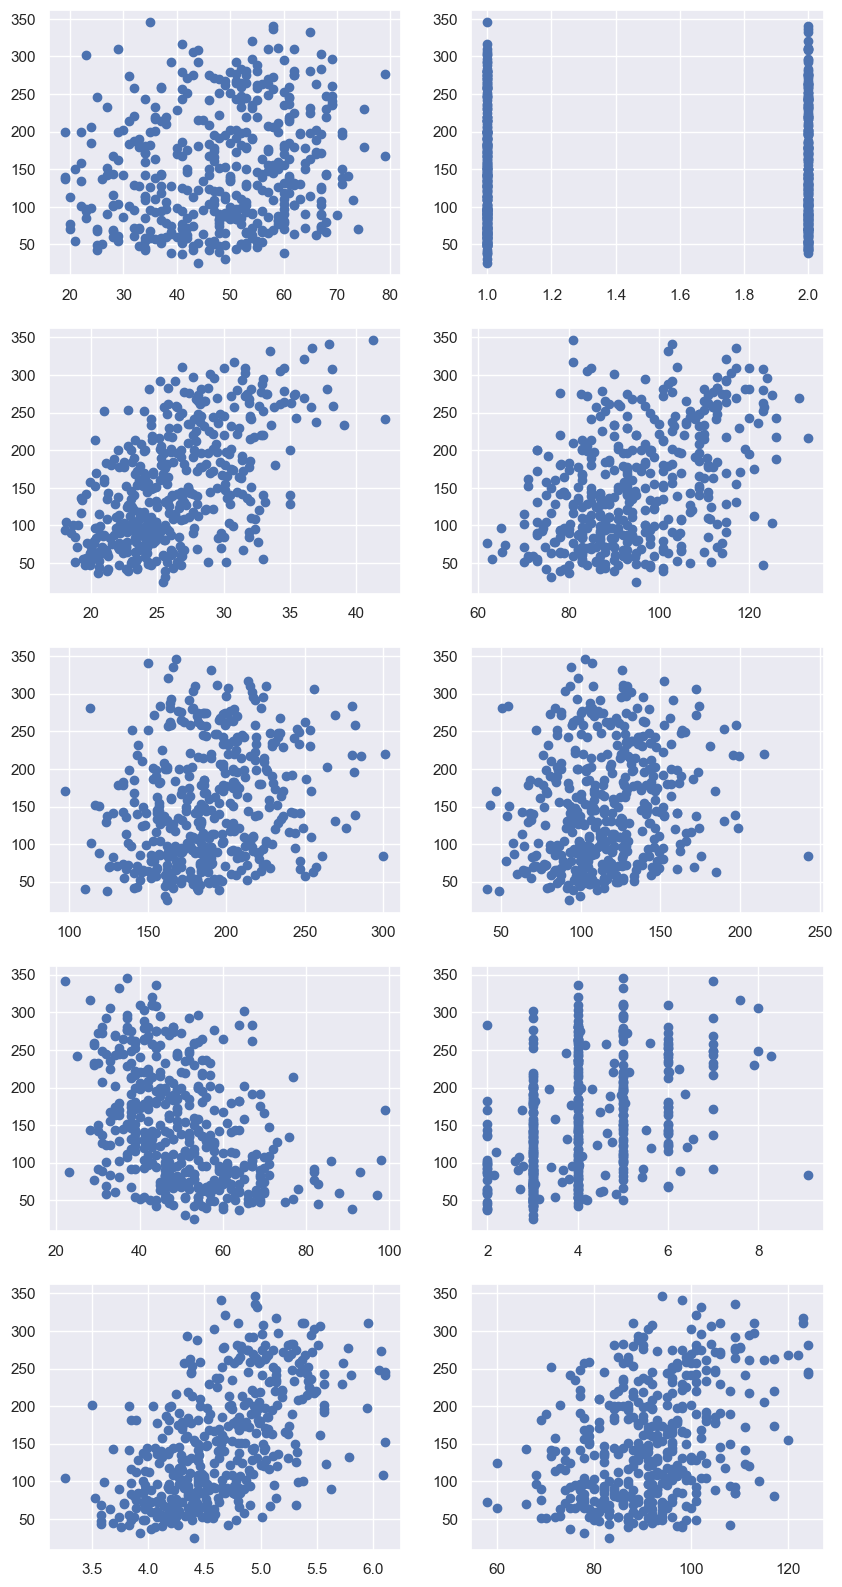

In [3]:
###################
# INSERT CODE HERE
###################
## TODO: plot the target as a function of each feature independantly
## using plt.scatter
fig, axs = plt.subplots(5, 2, figsize=(10,20))


for index in range(10):
    axs[index//2,index%2].scatter(X[:,index],t)
        


### 1.2 Univariate regression

<div class="alert alert-info">

**Pseudo-Inverse method**

We can present our dataset of $P$ datapoints with $\mathbf{t}$ the vector of the targets of length $P$ and $\mathbf{X}$ of shape $P \times (D+1)$ (the $+1$ is there to accommodate for the bias). We want to find the vector of weights $\mathbf{w}$ that minimizes the Mean Squared Error (MSE) criterion. Leading to the following equation
\begin{alignat*}{2}
    && E &= \frac{1}{P} \|\mathbf{t}-\mathbf{X}\mathbf{w}\|^2 \\
    &\Leftrightarrow~ & \left(\displaystyle\frac{\partial E}{\partial \mathbf{w}} \right) &= \frac{2}{P}\left( \mathbf{t}-\mathbf{X}\mathbf{w}\right) \mathbf{X} = \mathbf{0}\\
    &\Leftrightarrow~ & \mathbf{0} &= \mathbf{X}^T\mathbf{t} - \mathbf{X}^T\mathbf{X}\mathbf{w}\\
    &\Leftrightarrow~ & \mathbf{X}^T\mathbf{X}\mathbf{w} &= \mathbf{X}^T\mathbf{t}\\
    &\Leftrightarrow~ & \mathbf{w} &= \left( \mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{t}.
\end{alignat*}
This is different from the course's definition due to the *transposed* way the matrices are defined.

For this first regression you'll have to **choose** one feature. Once you have selected it (based on your results from previous exercise), you can perform linear regression. 
</div>

<div class="alert alert-success">
    
**Linear regression on one feature**
    
    
* **Implement** linear regression using the pseudo-inverse method `numpy.linalg.inv`. Take a piece of paper to write down vector dimensions before blindly going into the coding part.<br>
    
    
* **Visualize** the result of your regression.  In particular, compare your prediction with the actual target values.  Are the results satisfactory ?  How could you improve them?  

</div>


In [8]:
from sklearn.base import BaseEstimator


class MyLinearRegressor(BaseEstimator):
    def __init__(self, add_bias=True):
        super().__init__()
        self.add_bias = add_bias
        
    def fit(self, X, y):
        if X.ndim == 1:
            X = X.reshape(len(X),1)

        if self.add_bias:
            
            X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=-1)    # Bias added as last column 
        ###################
        # INSERT CODE HERE:
        # Implement the pseudo-inverse method
        # watch out for matrix and vector dimensions!
        ###################
        w = np.linalg.inv(X.T@X)@X.T@y

        self.coeffs = w[:-1] if self.add_bias else w
        self.bias = w[-1] if self.add_bias else 0
        
        return self
        
    
    def predict(self, X):
        if X.ndim == 1:
            X = X.reshape(len(X),1)
            self.coeffs = self.coeffs.reshape([1,1])

        y = X@self.coeffs+self.bias
        return y
        
        
    def fit_predict(self, X, y):
        return self.fit(X, y).predict(X)
    
    def score(self, X, y_true):
        y = self.predict(X)
        return compute_rmse(y, y_true)

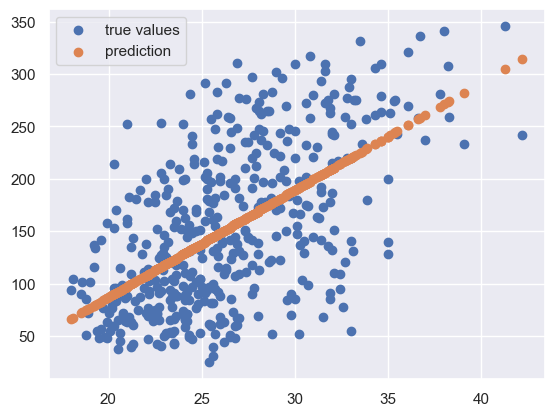

In [9]:
###################
# INSERT CODE HERE:
# Fit a model to the data 
# and plot the results
###################

one_reg = MyLinearRegressor(add_bias=True)
one_reg.fit(X[:,2],t)

plt.scatter(X[:,2],t,label="true values")
plt.scatter(X[:,2],one_reg.predict(X[:,2]),label="prediction");
plt.legend();


### 1.3 RMSE & Bivariate Linear Reg.

We'll now step things up! Choose one more feature (so take the 2 best features), still using only visual clues. You'll now adapt the linear regressor and *train* another one taking those *2* features into account.

To evaluate which model better fits the data in a regression problem, a nice and simple metric to use is the RMSE. This is a formal criterion that can be used to show which model is able to approximate the target values more accurately (with respect to training data). 

<div class="alert alert-info">
    
**Expression of RMSE**

\begin{equation*}
RMSE = \sqrt{\frac{1}{P} |\mathbf{t}-\mathbf{X}\mathbf{w}|^2 }
\end{equation*}


where $\mathbf{t}$ is the value of the target (ground truth) and $\mathbf{X}\mathbf{w}$ is the prediction (output) of a model.

</div>

<div class="alert alert-success">

**Implementing the RMSE function and the bivariate LR**

* **Write** the RMSE function
* **Compute** the Linear Regression by selecting 2 features this time. Does the RMSE improve when using 2 vectors
</div>


In [10]:
from math import sqrt
# Compute the Root Mean Square Error
def compute_rmse(predict, target):
    ###################
    # INSERT CODE HERE: 
    # fill in the RMSE score function
    ###################
    return np.sqrt(np.sum((target-predict)**2)/len(target)) # to modify

###################
# INSERT CODE HERE: 
# Create one 1-var linear regressor and one 2-vars linear regressor;
# Predict target values according to both models
###################
linreg = MyLinearRegressor()
best_indices = np.array([4])    # To modify
xx = X[:, best_indices]

predict = linreg.fit_predict(xx, t)
print("1-var:",compute_rmse(predict, t))

best_indices = np.array([2,4])    # To modify
xx = X[:, best_indices]

predict = linreg.fit_predict(xx, t)
print("2-var:",compute_rmse(predict, t))

1-var: 75.25500397807015
2-var: 62.15536600717099


### 1.4 Multivariate Linear Reg.

<div class="alert alert-success">
    
**Implement multivariate LR**
* **Sort** all the features according to their linearity with the target vector.
* **Test** your extended framework by cumulating all the features (first 1, then 2, followed by 3, 4 etc). What do you conclude? Is there an optimal number of features.
* **Compute** the accuracy of the models trained over the growing number of features
</div>


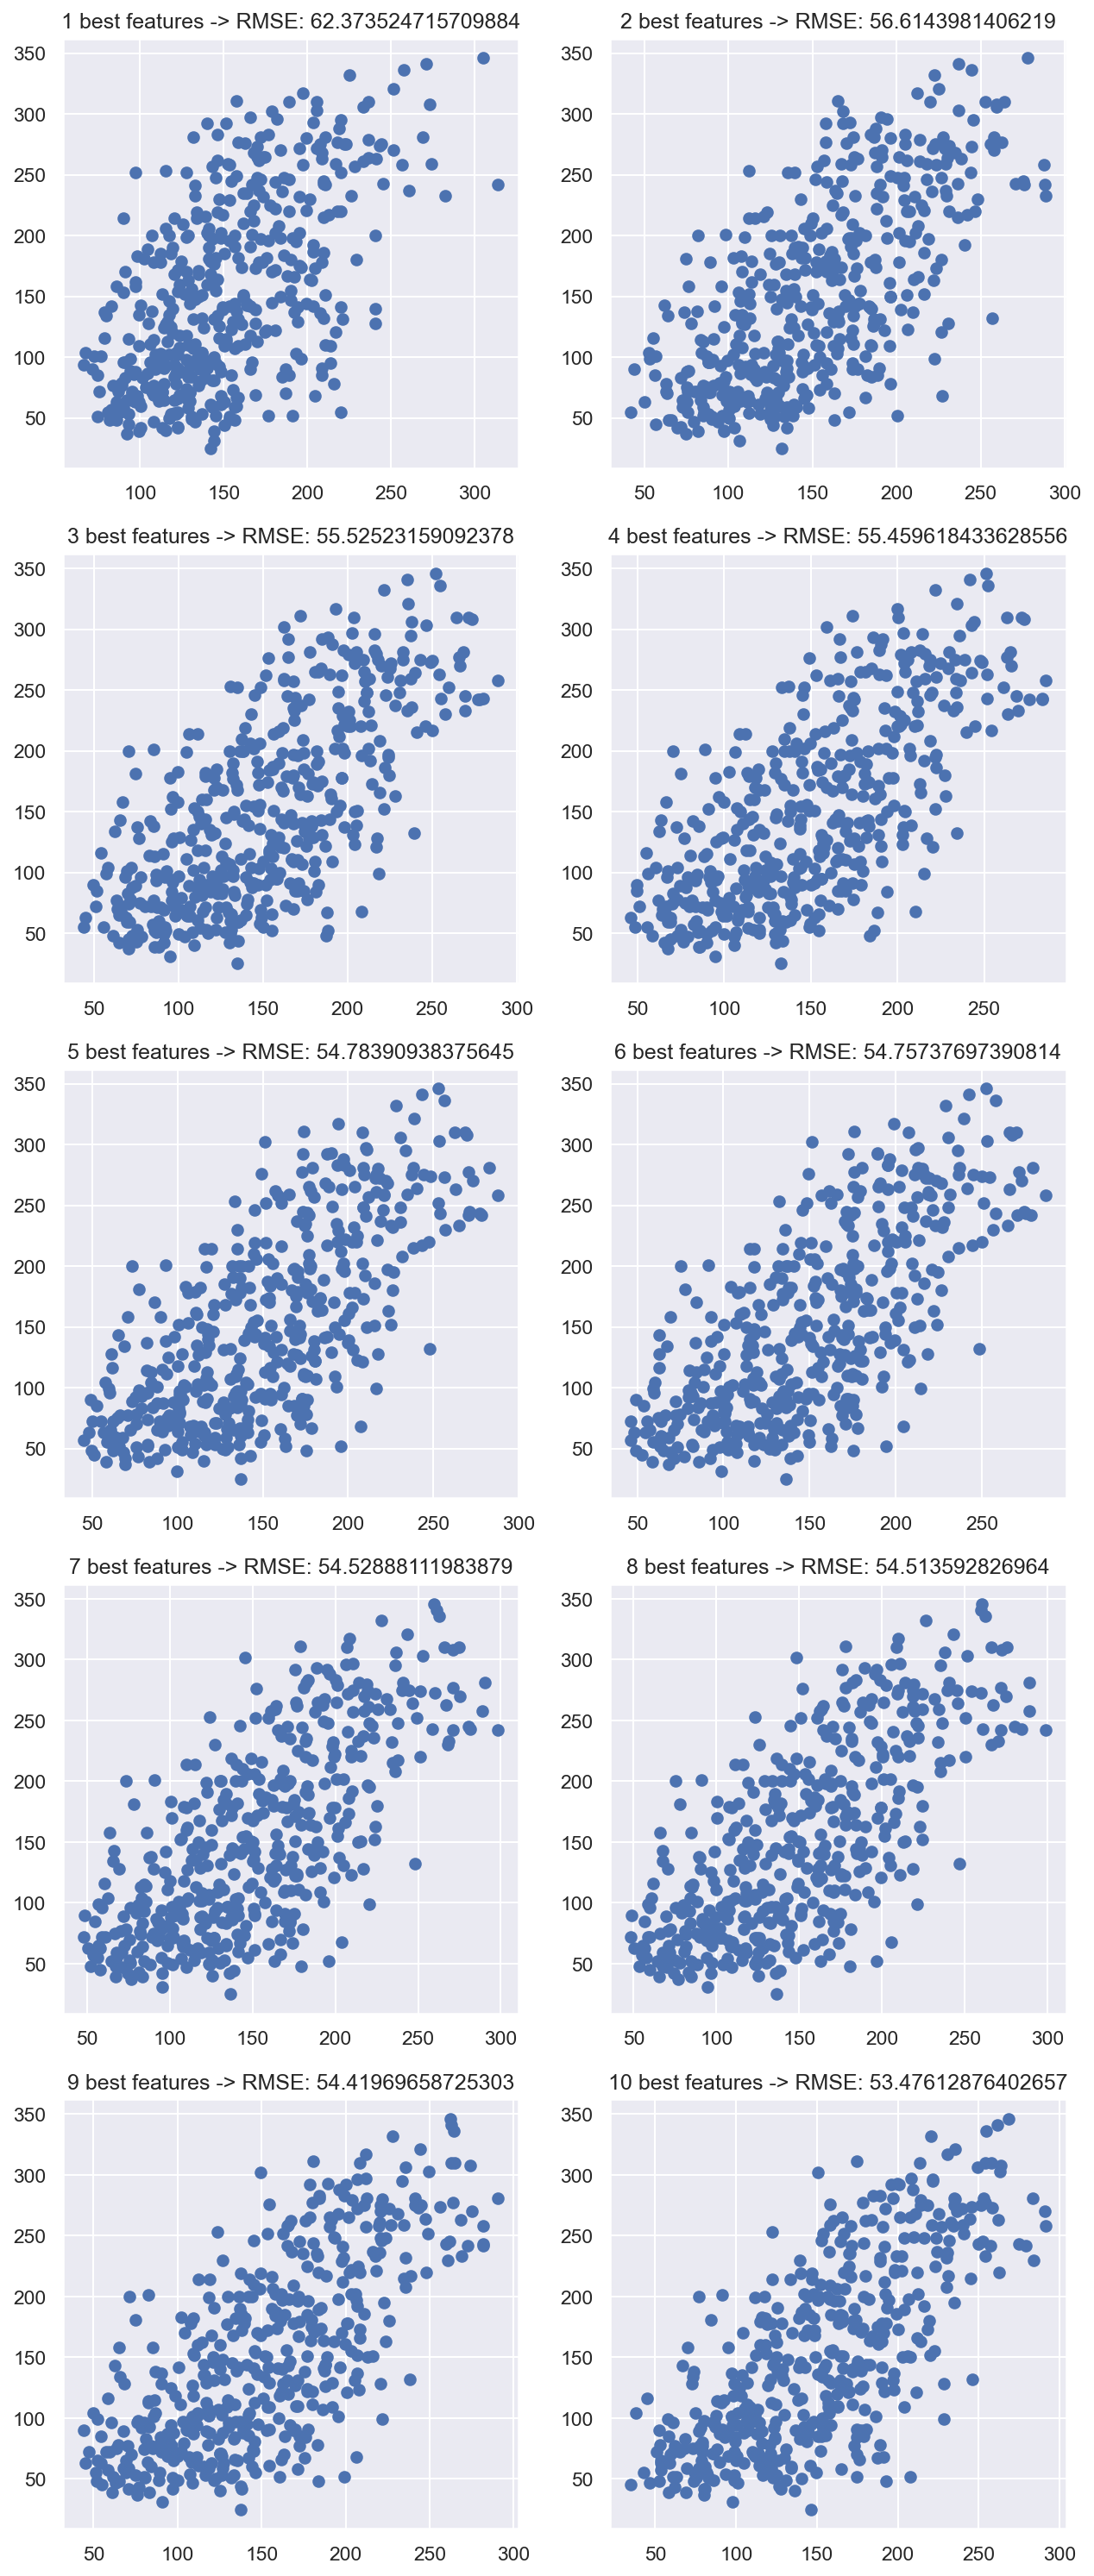

In [11]:
plt.figure(figsize=(10, 25), dpi=150)

###################
# INSERT CODE HERE:
# fill in the sorted_features vector
###################
correlations = []
for i in range(X.shape[1]):
    corr = np.corrcoef(X[:, i], t.ravel())[0, 1]  # Get correlation coefficient
    correlations.append(abs(corr))
    
sorted_indexes = []
for i in range(10):
    index = correlations.index(max(correlations))
    sorted_indexes.append(index)
    correlations[index] = -9999



sorted_features = sorted_indexes

for i in range(1,len(t_names)+1):
    linreg = MyLinearRegressor()
    best_indices = sorted_features[:i]
    xx = X[:, best_indices]

    predict = linreg.fit_predict(xx, t)
    
    plt.subplot(5,2,i)
    plt.scatter(predict, t)
    plt.title(f'{i} best features -> RMSE: {compute_rmse(predict, t)}')
	

plt.show()

### 1.5 Train-test Generalization
To test out the generalization of your linear regressor, a data separation step is necessary. You'll now split the dataset in two equal parts at random ({X1, t1} and {X2, t2}). This will allow you to build a model on the former and assess its performance on the latter.

<div class="alert alert-success">

**Divide and conquer generalization errors**

* **Repeat** ex. 1.4 but this time seperating your training set in 2 parts: train and test as given in the code below.
* **Test** your model on {X2,t2}.  Is it as good as the first one? How do you explain the difference between the two? What are the key concepts behind that? 
</div>



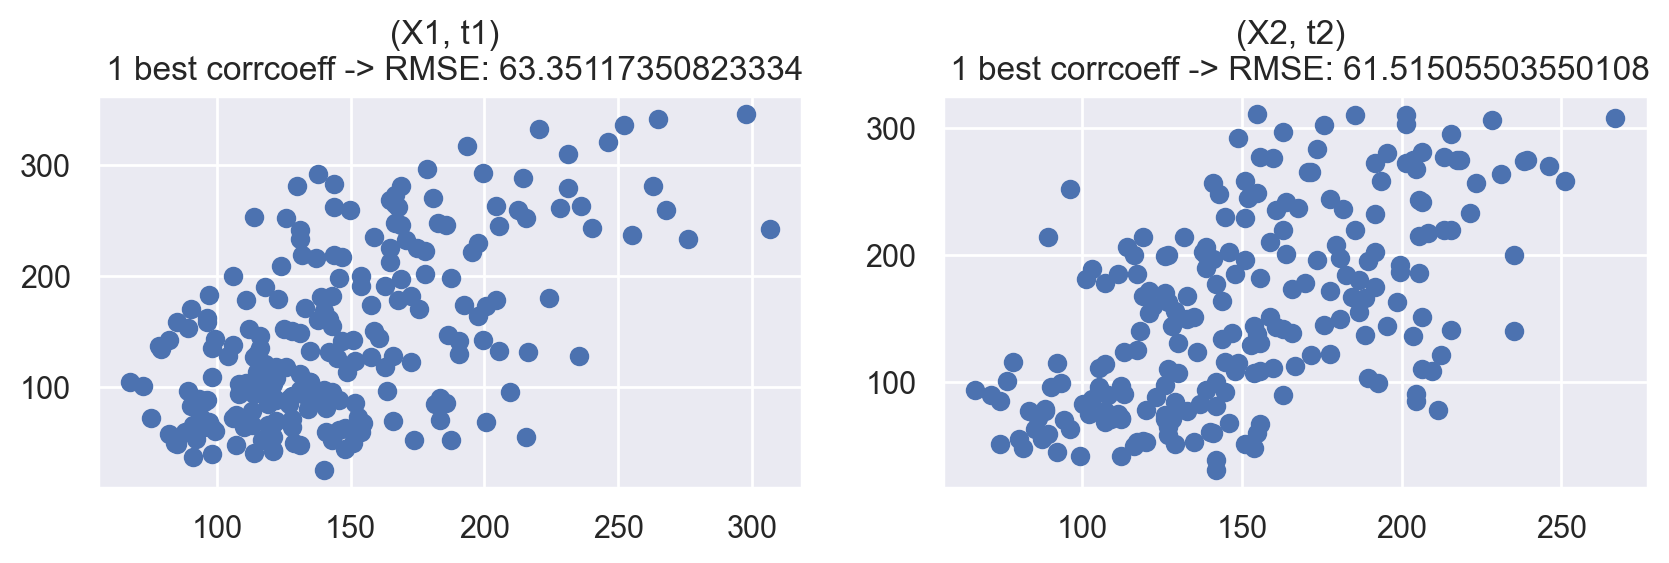

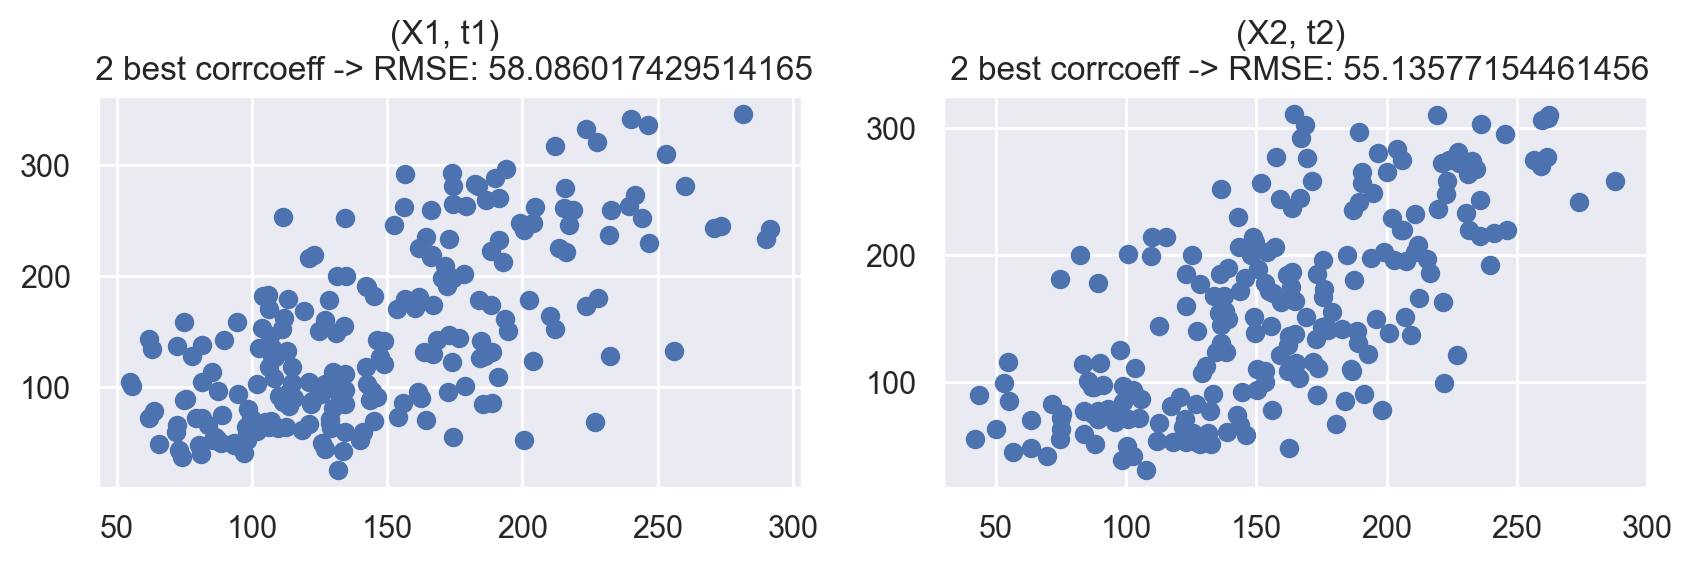

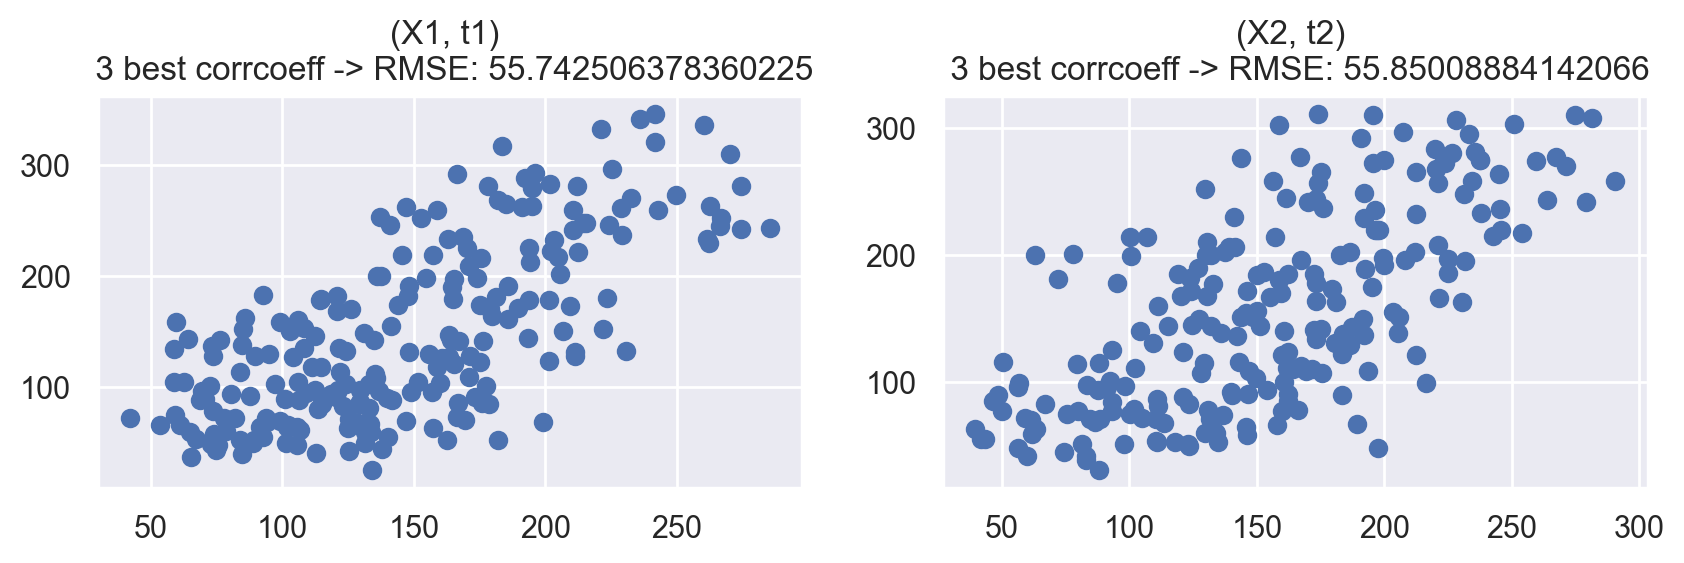

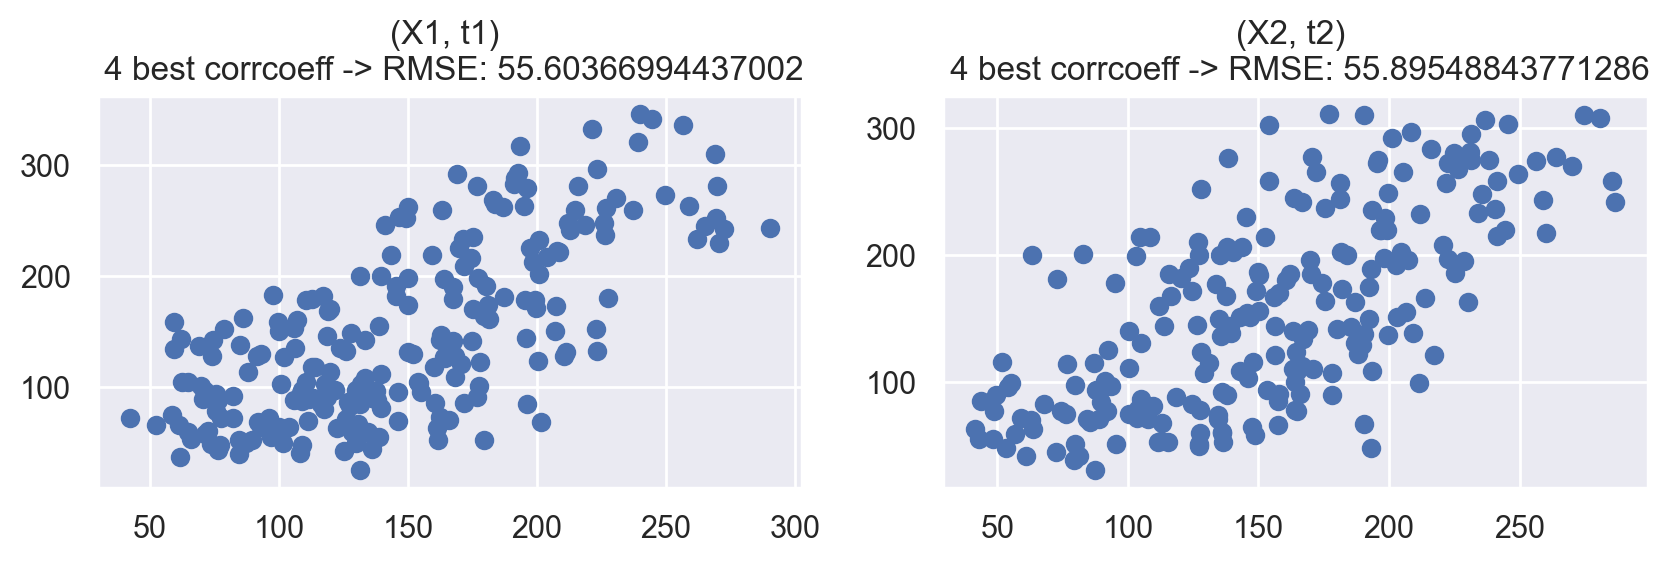

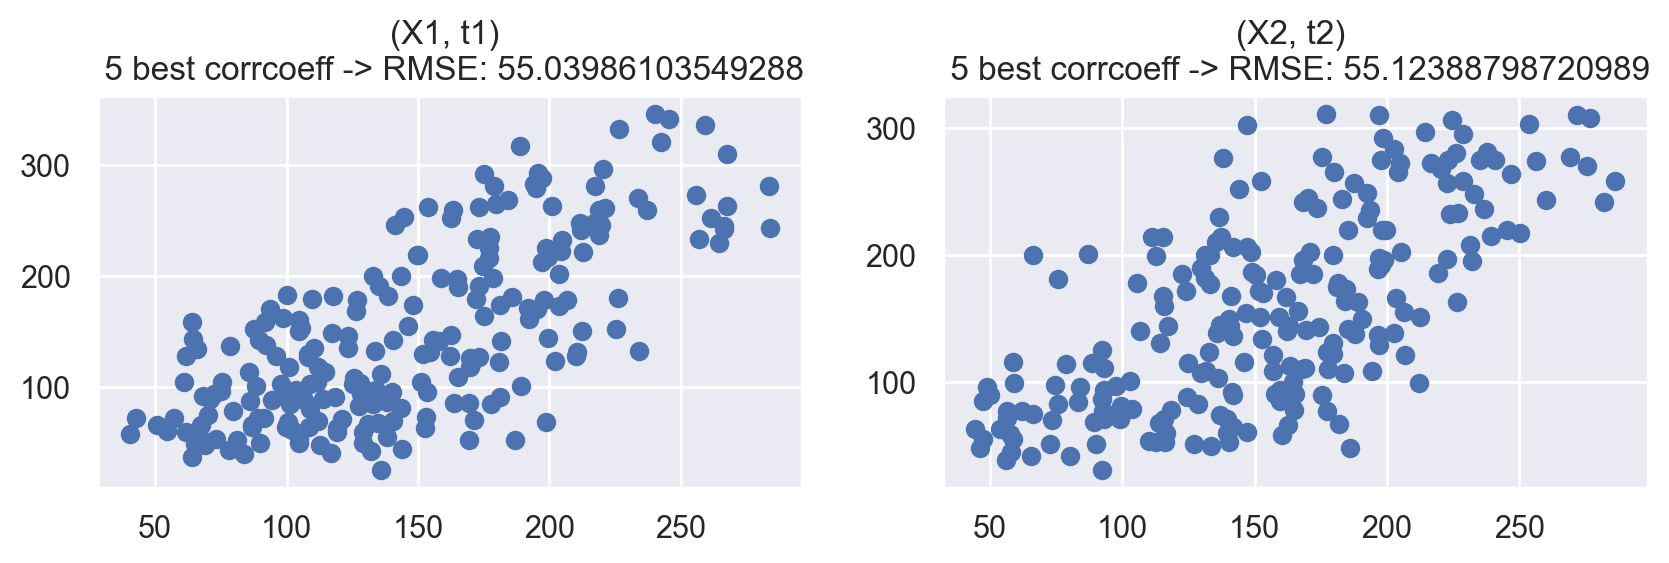

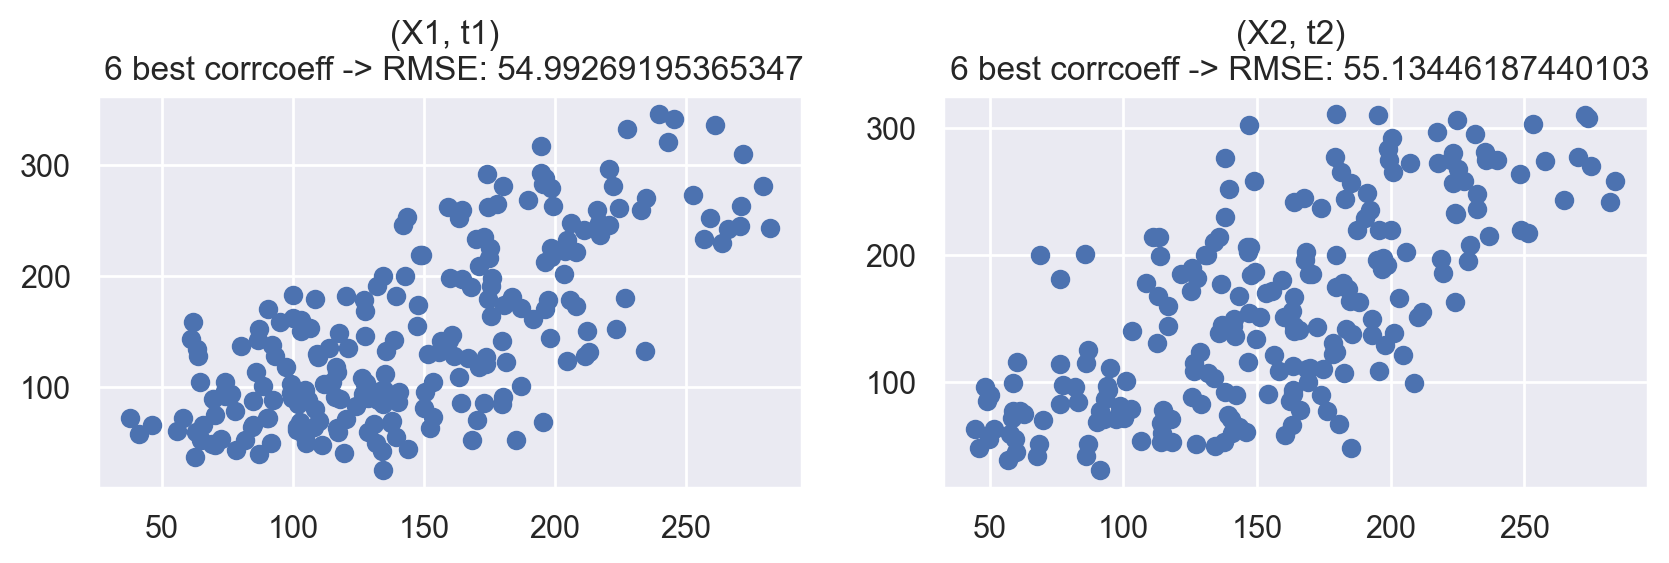

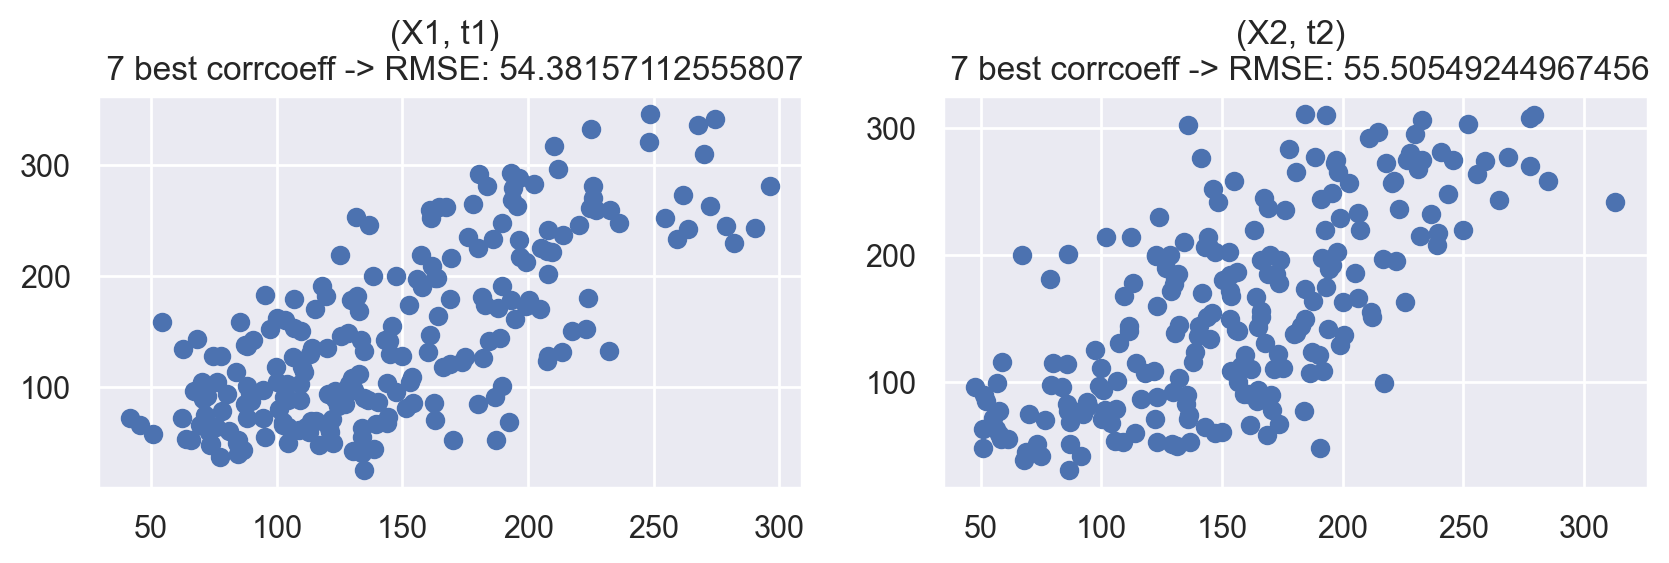

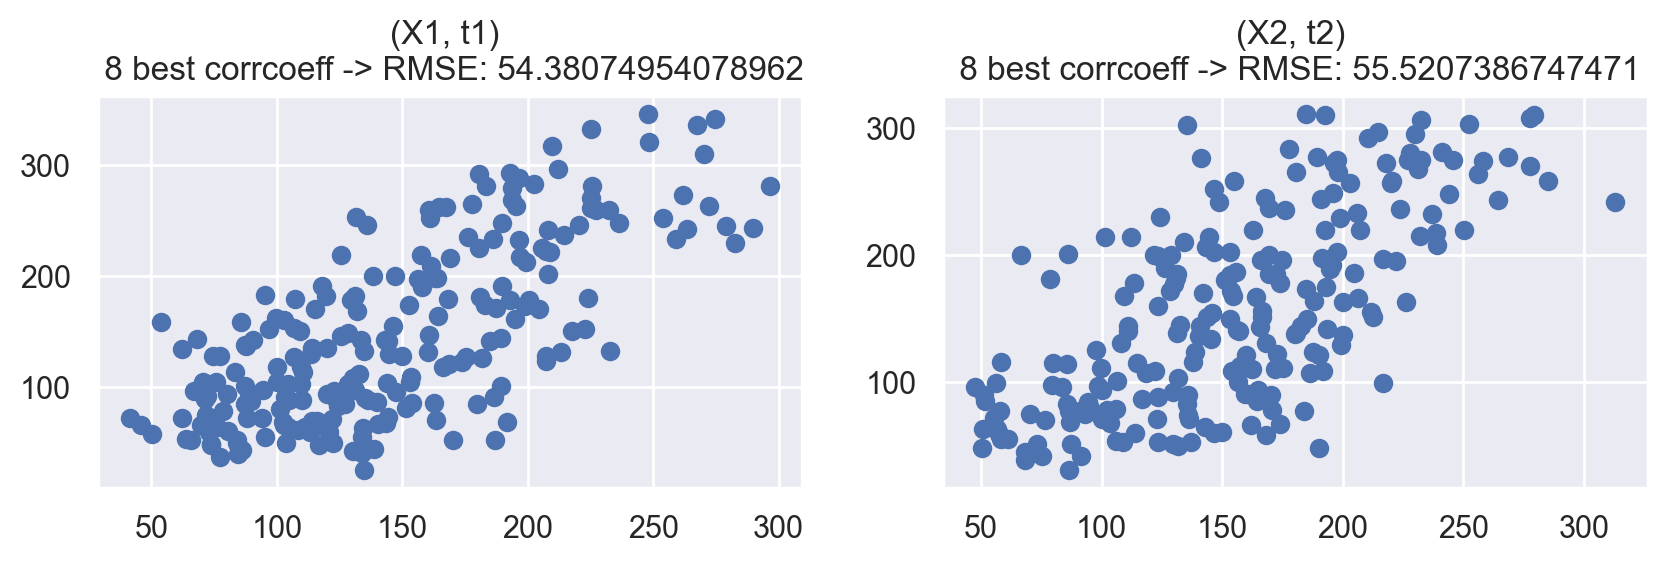

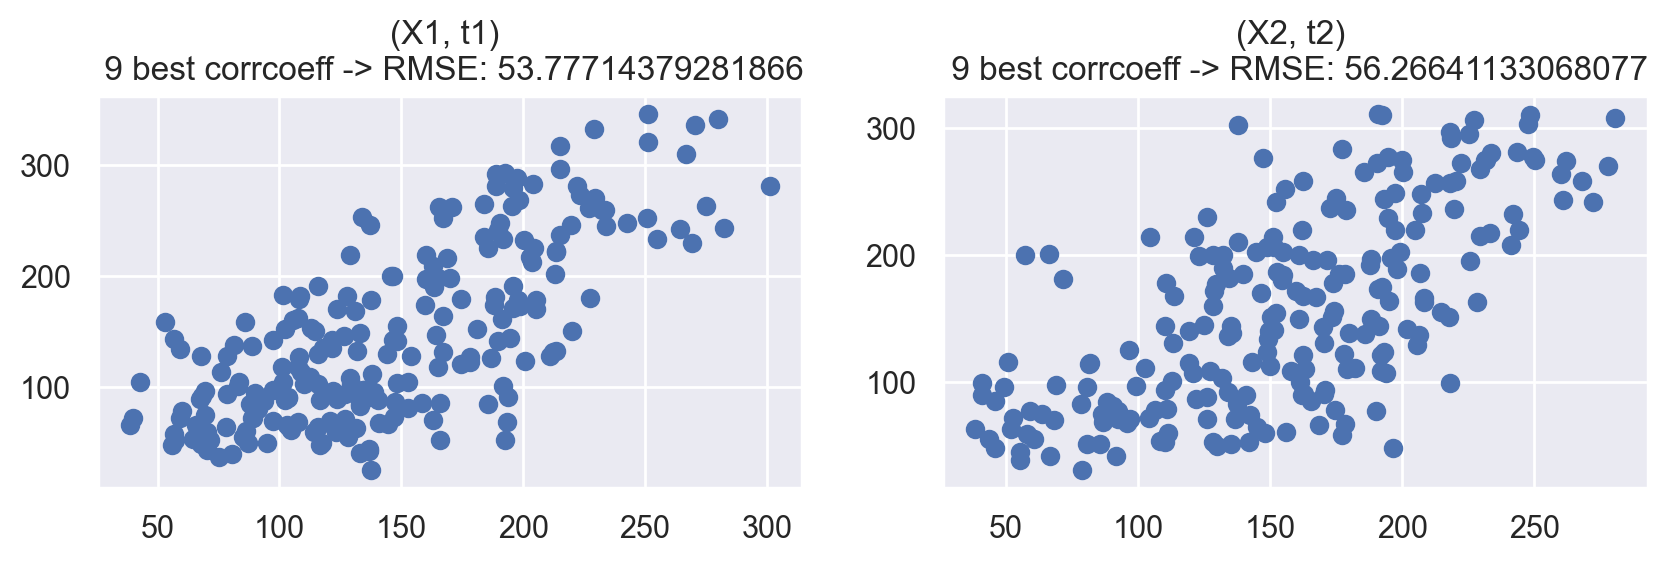

In [12]:
X_copy = X.copy()
t_copy = t.copy()

def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

X_perm, t_perm = unison_shuffled_copies(X_copy, t_copy)
half_index = X_perm.shape[0]//2

X1 = X_perm[:half_index, :]
X2 = X_perm[half_index:, :]

t1 = t_perm[:half_index, :]
t2 = t_perm[half_index:, :]

linreg = MyLinearRegressor()
###################
# INSERT CODE HERE:
# add a for loop around i, or change it manually
###################
for i in range(1,10):
	best_indices = sorted_features[:i]

	xx1 = X1[:, best_indices]
	xx2 = X2[:, best_indices]

	linreg.fit(xx1, t1)

	plt.figure(figsize=(10, 30), dpi=200)


	plt.subplot(10,2,2*i+1)
	predict_X1 = linreg.predict(xx1)
	plt.scatter(predict_X1, t1)
	plt.title(f'(X1, t1) \n {i} best corrcoeff -> RMSE: {compute_rmse(predict_X1, t1)}')


	plt.subplot(10,2,2*i+2)
	predict_X2 = linreg.predict(xx2)
	plt.scatter(predict_X2, t2)
	plt.title(f'(X2, t2) \n {i} best corrcoeff -> RMSE: {compute_rmse(predict_X2, t2)}')


## 1.6 Stochastic Gradient Descent

While the pseudo-inverse method gives the *exact* solution, it isn't always possible or feasible to inverse matrices. It remains however possible to update the parameters or weights in an iterative fashion by using Stochastic Gradient Descent (SGD). Through the computation of the gradient of the weights with respect to the objective function (= Mean Squared Error in our case) for an input $\mathbf{x}$, it is possible to approach the optimal solution. We also refer to this objective function as the Loss ($\mathcal{L}$). During the SGD process the point is to *minimize* this Loss.

<div class="alert alert-info">
 
**Back-propagation for bi-variate Linear Regression**

![image.png](data/image.png)
    
Computational graph of a bi-variate linear regression. The red arrows represent the gradients flowing from the loss to the weights.
</div>



<div class="alert alert-success">

**Solving Regression with SGD**
* On a piece of paper **write** the missing gradient computations from the figure above.
* Once you've computed the equations, **implement** them in the code below and **check** that your solution converges to the same one as the inverse method. Do you think there is more than 1 possible optimal solution? Why?
* Try **tuning** the meta-parameters (`n_epochs, lr, lr_annealing`). Does this make the solution better? Which meta-parameter is the most important one? And what happens when you skew the *initial* value of the parameters towards their optimal values?
</div>


In [81]:
class MySGDLinearRegressor(MyLinearRegressor):
    def __init__(self, n_epochs=100, lr=1e-3, lr_annealing=0.99, **kwargs):
        super().__init__(**kwargs)
        self.n_epochs = n_epochs
        self.lr = lr
        self.lr_annealing = lr_annealing
        
    def fit(self, X, y):
        assert X.shape[-1] == 2, "Only 2 features are supported for now"
        
        w0 = 1
        w1 = 100
        b  = -250 if self.add_bias else 0
        lr = self.lr
        ## Compute coeffs
        for epoch in range(self.n_epochs):
            for x, ytrue in zip(X, y):
                ypred = w0 * x[0] + w1 * x[1] + b
                
                
                gradient_loss = 2*(ypred-ytrue)
               
                
                ###################
                # Update weights
                ###################
                w0 = w0 - lr * gradient_loss * x[0]
                w1 = w1 - lr * gradient_loss * x[1]
                b  = b  - lr * gradient_loss
                ###################

                # Update lr (lr-annealing slowly diminishes the lr)
                lr = lr*self.lr_annealing/(lr+self.lr_annealing)

        self.coeffs = np.array([w0, w1])
        self.bias = b[0] if self.add_bias else 0
        return self
best_indices = sorted_features[-2:]
xx = X[:, best_indices]

linreg = MyLinearRegressor()
sgdlinreg = MySGDLinearRegressor(n_epochs=10000, lr=1e-5, lr_annealing=0.99, add_bias = True)

real_score = linreg.fit(xx, t).score(xx, t)
sgd_score = sgdlinreg.fit(xx, t).score(xx, t)

print(f"Pseudo-inverse method: {real_score:5.2f} (coeffs: {linreg.coeffs[0][0].item():03.2f}, {linreg.coeffs[1][0].item():03.2f}, bias={linreg.bias.item():03.2f})")
print(f"SGD method:            {sgd_score:5.2f} (coeffs: {sgdlinreg.coeffs[0][0]:03.2f}, {sgdlinreg.coeffs[1][0]:03.2f}, bias={sgdlinreg.bias:03.2f})")

Pseudo-inverse method: 75.82 (coeffs: 0.43, 2.87, bias=97.76)
SGD method:            92.98 (coeffs: 1.63, 69.03, bias=-149.49)


### Additional Comments
Although the act of finding the coefficients of a linear regressor is a convex problem (meaning that there is a verifiable optimal point in the loss landscape), you'll notice that SGD won't be able to easily find this optimal solution.
However, if you remove the bias, you'll notice that SGD will converge to a really close solution (you can even get way closer by better tuning of the LR and annealing rate). So this implies that it is really hard to find the optimal value for the bias. Why? Simply because the LR is applied uniformly to all the parameters. Since the optimal bias is an order of magnitude farther from its initial value than the weights (>100 compared to ≃10), it can't possibly get to that value without an adaptive rescaling of the gradients (methods such as Adam or SGD with momentum have this kind of rescaling). You can try by setting -250 or -270 as the starting point for the bias and you'll notice how much closer you'll get :)

In short, it's important to be able to adapt some values more than others or to choose a correct initial value.
Do you think that using a Standardscaler (check the sklearn docs!) to rescale the data could help your convergence? Does this transformation change the final RMSE of the linear regressor that uses the pseudo-inverse method? Try to find why (it could come in handy for the exam ;) )